# USing EEG data with aeon

This notebook gives some simple examples of loading EEG from BIDS format, processing
with basic `aeon-neuro` tools then making predictions with `aeon`. It has been prepared
for the 2024 KDD tutorial [A Hands-on Introduction to Time Series Classification and
Regression](https://aeon-tutorials.github.io/KDD-2024/).



## Example EEG in BIDS format

Example EEG data for a classification problem is in [this directory](../example_raw_eeg). The data was collected in 2024 by Aiden Rushbrooke as part of his
 PhD. He is the single subject, each case is either him at rest or a repetition of the
 task. The problem is to predict if Aiden is raising his hands slightly from a desk
 (class task) or not (class rest). The original data is sampled at 112.5 Hz on 32
 EEG channels and consists of 480 cases. A simple function to load the data into a
 list of numpy arrays is provided below. Note the function is hard coded to work
 with this problem. The parameters are hard to generalise: they will need to be
 adapted for another experiment. To run this specific function from a different
 location, change the path variable to the relative location of the `example_raw_eeg`
  directory. This function does some
 standard preprocessing. It
  drops any non EEG channels then filters the data between 0.5 and 100 Hz. It then
  creates cases by extracting the 10 second region around the task (if task is true) or
  through a segmenting the data into 10 second cases. There are 240 if each class.


In [8]:
import numpy as np

from aeon_neuro.data.load_bids import load_basic_classification_problem

train_X, train_y, test_X, test_y = load_basic_classification_problem(path="../")
unique_values, counts = np.unique(train_y, return_counts=True)
unique_values2, counts2 = np.unique(test_y, return_counts=True)
print("Unique class values = ", unique_values)
print("Class counts train= ", counts, " class counts test = ", counts2)
print(" Train shape  = ", train_X.shape, " Test shape = ", test_X.shape)

Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-task_run-01_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 82490  =      0.000 ...    82.490 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-task_run-02_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 94522  =      0.000 ...    94.522 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-task_run-03_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 99533  =      0.000 ...    99.533 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-task_run-04_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 91005  =      0.000 ...    91.005 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-task_run-05_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 80010  =      0.000 ...    80.010 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-task_run-06_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 86499  =      0.000 ...    86.499 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-01_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 311509  =      0.000 ...   311.509 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-02_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 306522  =      0.000 ...   306.522 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-03_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 310531  =      0.000 ...   310.531 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-04_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 311008  =      0.000 ...   311.008 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-05_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 310514  =      0.000 ...   310.514 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Extracting parameters from ../example_raw_eeg/basic_classification_task/sub-01/ses-01/eeg/sub-01_ses-01_task-rest_run-06_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 310497  =      0.000 ...   310.497 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Unique class values =  ['rest' 'task']
Class counts train=  [120 120]  class counts test =  [120 120]
 Train shape  =  (240, 32, 1000)  Test shape =  (240, 32, 1000)


The data is formatted into shape `(480, 32, 1000)` where 480 is the number of cases, 32
 the number of channels and 1000 the number of time points. This is the
 preferred aeon format for time series classification and regression. If the series for
 each case are unequal length, it should be stored in a list of 2D numpy. The
 data is split into train and test using different trials in test and train. Note
 that if different subjects are used in experiments, it may be desirable to resample
 differently.

We can now train and assess a classifier for this problem. We will use the
`RocketClassifier` from `aeon` using the `MiniRocket` transform. More info in the
[aeon docs](https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.classification.convolution_based.RocketClassifier.html).


In [9]:
from aeon.classification.convolution_based import RocketClassifier

rocket = RocketClassifier(rocket_transform="MiniRocket", random_state=49)
rocket.fit(train_X, train_y)
y_pred = rocket.predict(test_X)
print("Accuracy = ", np.mean(y_pred == test_y))

Accuracy =  0.9291666666666667


For the purposes of this demo and to highlight some uses of `aeon-neuro` and
`aeon`, we want to make the problems smaller. We downsample the data to 100
 time points.

In [10]:
from aeon_neuro.transformations import DownsampleCollectionTransformer

down = DownsampleCollectionTransformer(source_sfreq=112.50, target_sfreq=11.25)
Xsmall_train = down.fit_transform(train_X)
Xsmall_train = np.array(Xsmall_train)
Xsmall_test = down.transform(test_X)
Xsmall_test = np.array(Xsmall_test)
print("Xsmall_train shape = ", Xsmall_train.shape)
rocket.fit(Xsmall_train, train_y)
y_pred = rocket.predict(Xsmall_test)
print("Accuracy miniROCKET downsampled = ", np.mean(y_pred == test_y))  # noqa

Xsmall_train shape =  (240, 32, 100)
Accuracy miniROCKET downsampled =  0.8958333333333334


We can also use the `ChannelSelector` to select the best channels. This is a
supervised channel selection algorithm: score is found through cross validation of a
classifier independently on each channel. See the aeo [docs](https://www.aeon-toolkit
.org/en/stable/api_reference/auto_generated/aeon.transformations.collection
.channel_selection.ChannelScorer.html).

In [11]:
from aeon.transformations.collection.channel_selection import ChannelScorer

cs = ChannelScorer(proportion=0.1)  # keep 10% of channels, rounded up
cs_train = cs.fit_transform(Xsmall_train, train_y)
print("Selected channels = ", cs.channels_selected_)
cs_test = cs.transform(Xsmall_test)
print("CS test shape = ", cs_test.shape)
rocket.fit(cs_train, train_y)
y_pred = rocket.predict(cs_test)
print("Accuracy CS selected channels = ", np.mean(y_pred == test_y))

Selected channels =  [14 21 15 19]
CS test shape =  (240, 4, 100)
Accuracy CS selected channels =  0.85


We reduce the size further by selecting 40 cases from each class and
creating a separate univariate problem. This gives
 us a multivariate data set of train/test shape `(40, 4, 100)`. We
 stress we do this to make
 examples run quickly, but it is also interesting to see the effect on accuracy,
 which goes down a bit.  For univariate
 classification, we select the best channel to form data of shape `(40, 1, 100)`. Accuracy actually goes up, which shows the
need to not over interpret results from small datasets.


In [13]:
Xsmall3_train = np.concatenate((cs_train[0:20, :, :], cs_train[120:140, :, :]), axis=0)
y_small = np.concatenate((train_y[0:20], train_y[120:140]))
unique_values, counts = np.unique(y_small, return_counts=True)
print("Unique values = ", unique_values)
print("Counts = ", counts)
Xsmall3_test = np.concatenate((cs_test[40:60, :, :], cs_test[160:180, :, :]), axis=0)
y_small_test = np.concatenate((test_y[40:60], test_y[160:180]))
rocket.fit(Xsmall3_train, y_small)
print("Xsmall_train3 shape = ", Xsmall3_train.shape)
y_pred = rocket.predict(Xsmall3_test)
print("Xsmall3_test shape = ", Xsmall3_test.shape)
unique_values, counts = np.unique(y_small_test, return_counts=True)
print("Test set unique values = ", unique_values)
print("Counts = ", counts)
y_pred = rocket.predict(Xsmall3_test)
print("Accuracy reduced test = ", np.mean(y_pred == y_small_test))  # noqa

Unique values =  ['rest' 'task']
Counts =  [20 20]
Xsmall_train3 shape =  (40, 4, 100)
Xsmall3_test shape =  (40, 4, 100)
Test set unique values =  ['rest' 'task']
Counts =  [20 20]
Accuracy reduced test =  0.875


We can write the data to disk in aeon format. This is a simple text file format, see
[here](https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.datasets.write_to_tsfile.html) for more info.

In [14]:
import os

# Write to file
import tempfile

from aeon.datasets import load_from_tsfile, write_to_tsfile

header = "Text info at top of file"
with tempfile.TemporaryDirectory() as tmp:
    problem_name = "TestExample_TRAIN"
    write_to_tsfile(
        X=Xsmall3_train, path=tmp, y=y_small, problem_name=problem_name, header=header
    )
    load_path = os.path.join(tmp, problem_name)
    newX, newy = load_from_tsfile(full_file_path_and_name=load_path)
    print(" loaded shape", newX.shape)

 loaded shape (40, 4, 100)


These datasets are shipped with the `aeon-neuro` package in the directory KDD
examples. They can be loaded without the above preprocessing as follows

In [15]:
from aeon.datasets import load_classification

X_train, y_train = load_classification(
    name="KDD_MTSC", split="TRAIN", extract_path="../aeon_neuro/data/KDD_Examples"
)
X_test, y_test = load_classification(
    name="KDD_MTSC", split="TEST", extract_path="../aeon_neuro/data/KDD_Examples"
)
print("Multivariate X_train shape = ", X_train.shape)
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
print("Accuracy on multivariate = ", np.mean(y_pred == y_test))
X_train, y_train = load_classification(
    name="KDD_UTSC", split="TRAIN", extract_path="../aeon_neuro/data/KDD_Examples"
)
X_test, y_test = load_classification(
    name="KDD_UTSC", split="TEST", extract_path="../aeon_neuro/data/KDD_Examples"
)
print("Univariate X_train shape = ", X_train.shape)
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
print("Accuracy on univariate = ", np.mean(y_pred == y_test))

Multivariate X_train shape =  (40, 4, 100)
Accuracy on multivariate =  0.9
Univariate X_train shape =  (40, 1, 100)
Accuracy on univariate =  0.775


aeon has some series visualisation tools.

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

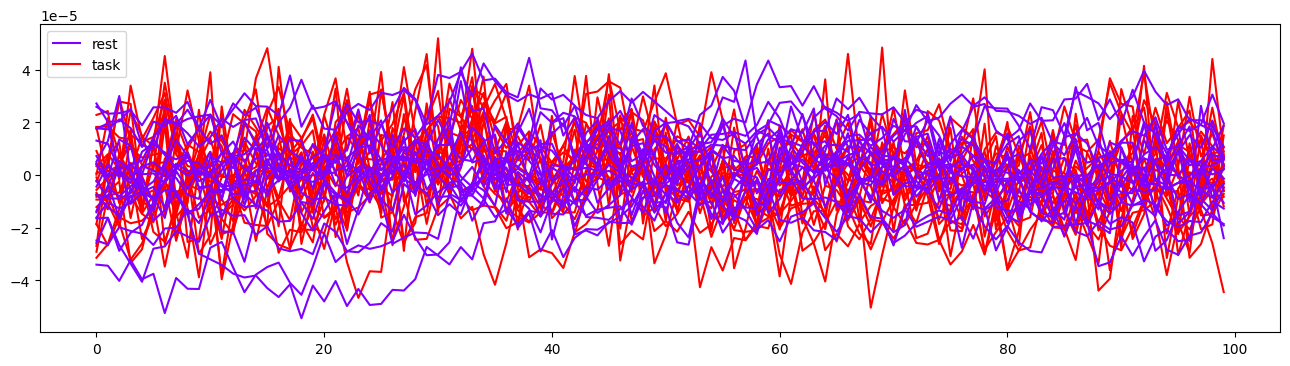

In [18]:
from aeon.visualisation.series._collections import plot_series_collection

plot_series_collection(X_train, y_train)